<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/Breast%20Cancer%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

In [10]:
# בדיקת ערכים חסרים
print(df.isnull().sum())

KeyError: "['id', 'Unnamed: 32'] not found in axis"

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

/tmp/ipython-input-15-3873699176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='magma')


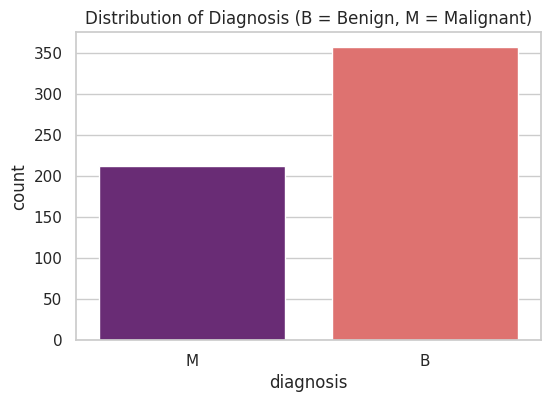

In [15]:
sns.set(style="whitegrid")


plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df, palette='magma')
plt.title('Distribution of Diagnosis (B = Benign, M = Malignant)')
plt.xlabel('diagnosis')
plt.ylabel('count')
plt.show()


In [16]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [27]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

Train size: (455, 30)
Test size: (114, 30)


In [28]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(x_train, y_train)

log_preds = log_model.predict(x_test)
log_accuracy = accuracy_score(y_test, log_preds)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")


Logistic Regression Accuracy: 0.9561


In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

knn_preds = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9561


In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

rf_preds = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.9649


In [34]:
svn_model = SVC()
svn_model.fit(x_train, y_train)

svm_preds = svn_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9474
